In [846]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle

# creation of cleaned_gross_budget.csv

In [847]:
bom = pd.read_csv('bom.movie_gross.csv.gz')
bom2 = bom.rename(columns={'title': 'movie'})
bom3 = bom2.drop(['domestic_gross', 'year'], axis=1)
bom3.head()

,movie,studio,foreign_gross
0,Toy Story 3,BV,652000000
1,Alice in Wonderland (2010),BV,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000
3,Inception,WB,535700000
4,Shrek Forever After,P/DW,513900000


In [848]:
tnmovie = pd.read_csv('tn.movie_budgets.csv.gz')
tnmovie1 = tnmovie.drop(['id'], axis=1)
tnmovie1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [849]:
gross_budget= pd.merge(bom3, tnmovie1, on='movie', how='inner')
gross_budget.head()

,movie,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,535700000,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,513900000,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,398000000,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,311500000,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [850]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              1247 non-null   object
 1   studio             1246 non-null   object
 2   foreign_gross      1086 non-null   object
 3   release_date       1247 non-null   object
 4   production_budget  1247 non-null   object
 5   domestic_gross     1247 non-null   object
 6   worldwide_gross    1247 non-null   object
dtypes: object(7)
memory usage: 77.9+ KB


In [851]:
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:

    gross_budget[col] = gross_budget[col].replace({'\\$': '', ',': ''}, regex=True).astype(float)
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   foreign_gross      1086 non-null   object 
 3   release_date       1247 non-null   object 
 4   production_budget  1247 non-null   float64
 5   domestic_gross     1247 non-null   float64
 6   worldwide_gross    1247 non-null   float64
dtypes: float64(3), object(4)
memory usage: 77.9+ KB


In [852]:
# Convert foreign gross from string to numeric
gross_budget['foreign_gross'] = pd.to_numeric(gross_budget['foreign_gross'], errors='coerce') 
gross_budget['production_budget'] = pd.to_numeric(gross_budget['production_budget'], errors='coerce')
gross_budget['domestic_gross'] = pd.to_numeric(gross_budget['domestic_gross'], errors='coerce')
gross_budget['worldwide_gross'] = pd.to_numeric(gross_budget['worldwide_gross'], errors='coerce')
gross_budget.head()

,movie,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
1,Inception,WB,535700000.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,513900000.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,311500000.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08


In [853]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   foreign_gross      1082 non-null   float64
 3   release_date       1247 non-null   object 
 4   production_budget  1247 non-null   float64
 5   domestic_gross     1247 non-null   float64
 6   worldwide_gross    1247 non-null   float64
dtypes: float64(4), object(3)
memory usage: 77.9+ KB


In [854]:
gross_budget.isna().sum()

movie                  0
studio                 1
foreign_gross        165
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [855]:
# drop missing values in every colum 
for column in gross_budget.columns:
    gross_budget = gross_budget.dropna(subset=[column])

gross_budget.isna().sum()


movie                0
studio               0
foreign_gross        0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [856]:
gross_budget.duplicated().sum()

0

In [857]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081 entries, 0 to 1244
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1081 non-null   object 
 1   studio             1081 non-null   object 
 2   foreign_gross      1081 non-null   float64
 3   release_date       1081 non-null   object 
 4   production_budget  1081 non-null   float64
 5   domestic_gross     1081 non-null   float64
 6   worldwide_gross    1081 non-null   float64
dtypes: float64(4), object(3)
memory usage: 67.6+ KB


In [858]:
gross_budget["profit"] = gross_budget["worldwide_gross"] - gross_budget["production_budget"]

In [859]:
gross_budget['release_date'] = pd.to_datetime(gross_budget['release_date'])

In [860]:
gross_budget["release_date"] = gross_budget["release_date"].dt.month

In [861]:
gross_budget.describe().T

,count,mean,std,min,25%,50%,75%,max
foreign_gross,1081.0,1.010362e+08,1.540983e+08,600.0,10500000.0,38100000.0,112200000.0,9.464000e+08
release_date,1081.0,6.923219e+00,3.487627e+00,1.0,4.0,7.0,10.0,1.200000e+01
production_budget,1081.0,5.183546e+07,5.671559e+07,100000.0,13400000.0,30000000.0,66000000.0,4.106000e+08
domestic_gross,1081.0,6.718373e+07,8.365910e+07,0.0,14945541.0,39175066.0,84273813.0,7.000596e+08
worldwide_gross,1081.0,1.677254e+08,2.286249e+08,0.0,31124367.0,81209222.0,203127894.0,1.403014e+09
profit,1081.0,1.158899e+08,1.886722e+08,-110450242.0,8626300.0,46009334.0,136562435.0,1.148258e+09


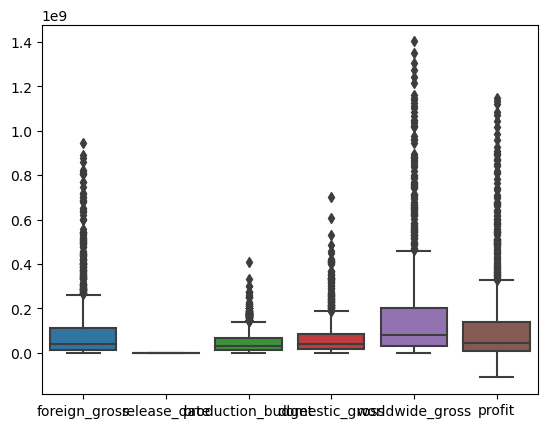

In [862]:
sns.boxplot(data=gross_budget);

In [863]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1081 non-null   object 
 1   studio             1081 non-null   object 
 2   foreign_gross      1081 non-null   float64
 3   release_date       1081 non-null   int64  
 4   production_budget  1081 non-null   float64
 5   domestic_gross     1081 non-null   float64
 6   worldwide_gross    1081 non-null   float64
 7   profit             1081 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 76.0+ KB


In [864]:
# save the cleaned data
gross_budget.to_csv('cleaned_gross_budget.csv', index=False)  # Saves without row index

# creation of cleaned_merged_data.csv

In [865]:
tmdb = pd.read_csv('tmdb.movies.csv.gz')
tmdb_drop = tmdb.drop(['Unnamed: 0', 'genre_ids', 'title', 'id'], axis=1)
tmdb_drop.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368
3,en,Toy Story,28.005,1995-11-22,7.9,10174
4,en,Inception,27.920,2010-07-16,8.3,22186


In [866]:
con = sqlite3.connect("im.db")
imdb = pd.read_sql("""
SELECT *
FROM sqlite_master
"""
, con)
imdb.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [867]:
movbasic = pd.read_sql("""
select *
from movie_basics
;""", con)
movbasic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [868]:
movrating = pd.read_sql("""
select *
from movie_ratings
;""", con)
movrating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [869]:
movies = pd.read_sql("""
select original_title, runtime_minutes, genres, averagerating, numvotes
from movie_basics
join movie_ratings
on movie_basics.movie_id = movie_ratings.movie_id
;""", con)
movies.head(20)

,original_title,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,136.0,Drama,6.8,451
8,Oda az igazság,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,180.0,Documentary,7.6,53


In [870]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   73856 non-null  object 
 1   runtime_minutes  66236 non-null  float64
 2   genres           73052 non-null  object 
 3   averagerating    73856 non-null  float64
 4   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB


In [871]:
merged_data = pd.merge(tmdb_drop, movies, on='original_title', how='inner')
merged_data

,original_language,original_title,popularity,release_date,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,98.0,"Action,Adventure,Animation",8.1,611299
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368,124.0,"Action,Adventure,Sci-Fi",7.0,657690
3,en,Inception,27.920,2010-07-16,8.3,22186,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.1,4229,118.0,"Adventure,Family,Fantasy",5.9,165108
...,...,...,...,...,...,...,...,...,...,...
17886,en,Closing Time,0.600,2018-02-24,0.0,1,116.0,Documentary,6.4,51
17887,en,The Last One,0.600,2018-10-01,0.0,1,80.0,"Documentary,History,News",7.0,26
17888,en,The Last One,0.600,2018-10-01,0.0,1,85.0,"Action,Adventure,Fantasy",6.1,15
17889,en,Trailer Made,0.600,2018-06-22,0.0,1,79.0,Adventure,4.3,25


In [872]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17891 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  17891 non-null  object 
 1   original_title     17891 non-null  object 
 2   popularity         17891 non-null  float64
 3   release_date       17891 non-null  object 
 4   vote_average       17891 non-null  float64
 5   vote_count         17891 non-null  int64  
 6   runtime_minutes    17394 non-null  float64
 7   genres             17831 non-null  object 
 8   averagerating      17891 non-null  float64
 9   numvotes           17891 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [873]:
merged_data.isna().sum()

original_language      0
original_title         0
popularity             0
release_date           0
vote_average           0
vote_count             0
runtime_minutes      497
genres                60
averagerating          0
numvotes               0
dtype: int64

In [874]:
# drop missing values in every colum 
for column in merged_data.columns:
    merged_data = merged_data.dropna(subset=[column])

print(merged_data.isna().sum())

original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64


In [875]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17347 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  17347 non-null  object 
 1   original_title     17347 non-null  object 
 2   popularity         17347 non-null  float64
 3   release_date       17347 non-null  object 
 4   vote_average       17347 non-null  float64
 5   vote_count         17347 non-null  int64  
 6   runtime_minutes    17347 non-null  float64
 7   genres             17347 non-null  object 
 8   averagerating      17347 non-null  float64
 9   numvotes           17347 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [876]:
merged_data = merged_data.drop_duplicates()
merged_data.duplicated().sum()

0

In [877]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16402 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  16402 non-null  object 
 1   original_title     16402 non-null  object 
 2   popularity         16402 non-null  float64
 3   release_date       16402 non-null  object 
 4   vote_average       16402 non-null  float64
 5   vote_count         16402 non-null  int64  
 6   runtime_minutes    16402 non-null  float64
 7   genres             16402 non-null  object 
 8   averagerating      16402 non-null  float64
 9   numvotes           16402 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.4+ MB


In [878]:
merged_data['release_date'] = pd.to_datetime(merged_data['release_date'])

In [879]:
merged_data["release_date"] = merged_data["release_date"].dt.month

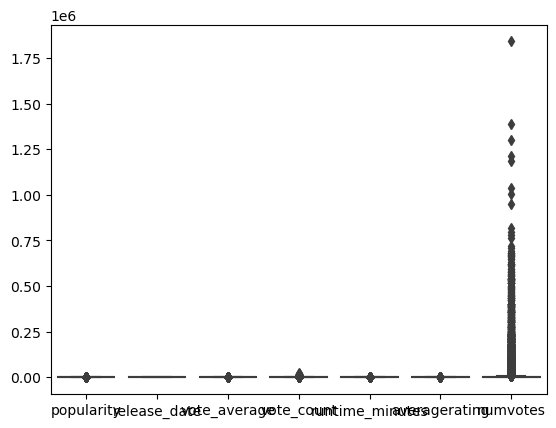

In [880]:
sns.boxplot(data=merged_data);

In [881]:
# save the cleaned data
merged_data.to_csv('cleaned_merged_data.csv', index=False)  # Saves without row index

# DATA ANALYSIS
## OBJECTIVE 4
### According to the release_time, which months generate the highest profits

In [882]:
# here we write a code that returns a Series with release_date as the index and the average profit for each release date.
month_profit = gross_budget.groupby('release_date')['profit'].mean()
# covert month_profit into a DataFrame
monthly_profit_df = pd.DataFrame(month_profit)
monthly_profit_df.reset_index(drop=False, inplace=True)

In [883]:
monthly_profit_df.sort_values('profit', ascending=False)

,release_date,profit
5,6,2.056081e+08
4,5,1.841222e+08
6,7,1.773121e+08
10,11,1.521733e+08
11,12,1.377070e+08
1,2,1.057154e+08
2,3,8.672660e+07
7,8,7.659689e+07
9,10,6.673615e+07
3,4,6.609266e+07


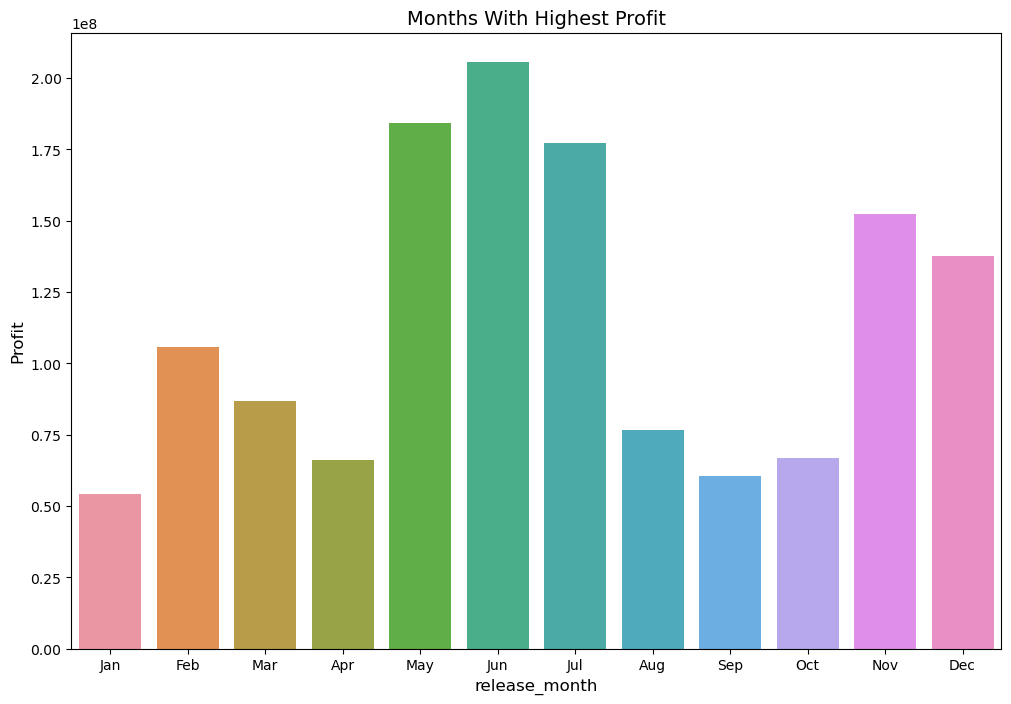

In [884]:
# Assuming 'monthly_profit_df' is a DataFrame with 'release_date' and 'profit' columns

fig, ax = plt.subplots(figsize=(12, 8))

# You can directly pass the DataFrame column names to sns.barplot using the 'x' and 'y' keyword arguments
sns.barplot(x='release_date', y='profit', data=monthly_profit_df, ax=ax)

ax.set_title('Months With Highest Profit', fontsize=14)
ax.set_xlabel("release_month", fontsize=12)
ax.set_ylabel("Profit", fontsize=12)
ax.set_xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

fig.savefig('Months With Highest Profit.png')

from the above bar graph we can see the highest profits were made in June, May and july respectively. If we were to produce a film based on profitabilty, the top three months would be the best period to release it.

# statistical distribution and inferential analysis

### QQ Plot
This is a great tool for visually assessing whether the profit data in gross_budget follows a normal distribution.

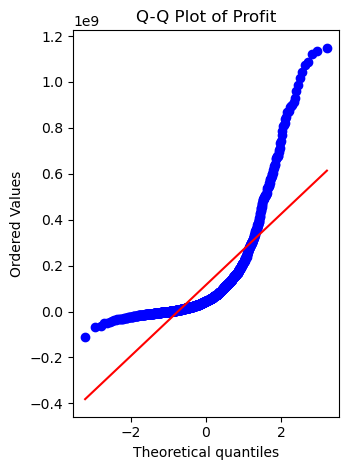

In [885]:
# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(gross_budget['profit'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Profit')
plt.tight_layout()
plt.show()


The points move away from the line at both ends, it could suggest the presence of outliers in the data, where extreme values (very high or very low profits) occur more frequently than would be expected in a normal distribution.

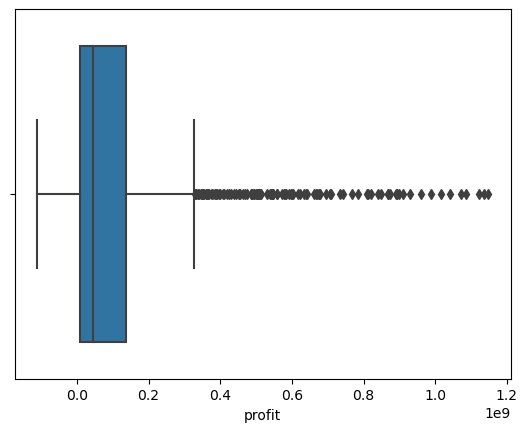

In [886]:
# checking for outliers
sns.boxplot(data=gross_budget, x="profit");

below we remove outliers from the profit column

In [887]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'profit' column
Q1 = gross_budget['profit'].quantile(0.25)
Q3 = gross_budget['profit'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
cleaned_data = gross_budget[(gross_budget['profit'] >= lower_bound) & (gross_budget['profit'] <= upper_bound)]

# Check how many rows were removed
removed_rows = len(gross_budget) - len(cleaned_data)
print(f"Number of outliers removed: {removed_rows}")

# Display the first few rows of the cleaned dataset
cleaned_data.head()

Number of outliers removed: 108


,movie,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross,profit
5,Tangled,BV,391000000.0,11,260000000.0,200821936.0,586477240.0,326477240.0
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,311300000.0,12,155000000.0,104386950.0,418186950.0,263186950.0
9,The Karate Kid,Sony,182500000.0,6,40000000.0,176591618.0,351774938.0,311774938.0
10,The Karate Kid,Sony,182500000.0,6,8000000.0,90815558.0,90815558.0,82815558.0
11,Black Swan,FoxS,222400000.0,12,13000000.0,106954678.0,331266710.0,318266710.0


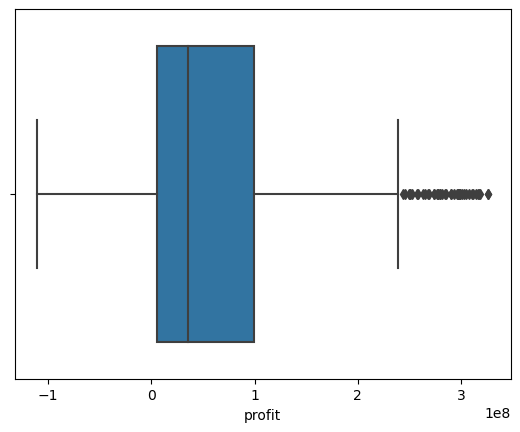

In [888]:
sns.boxplot(data=cleaned_data, x="profit");

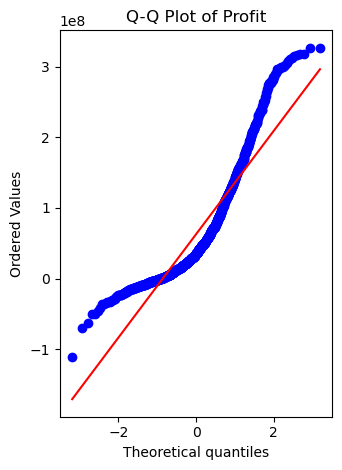

In [889]:
# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(cleaned_data['profit'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Profit')
plt.tight_layout()
plt.show()

now after fixing the outliers the points on the Q-Q plot mostly follow the diagonal line with only slight deviations, you can assume the profit data is roughly normally distributed.

The code written below generates two histograms with Kernel Density Estimates (KDE) to analyze the distribution of the profit from the dataset gross_budget.

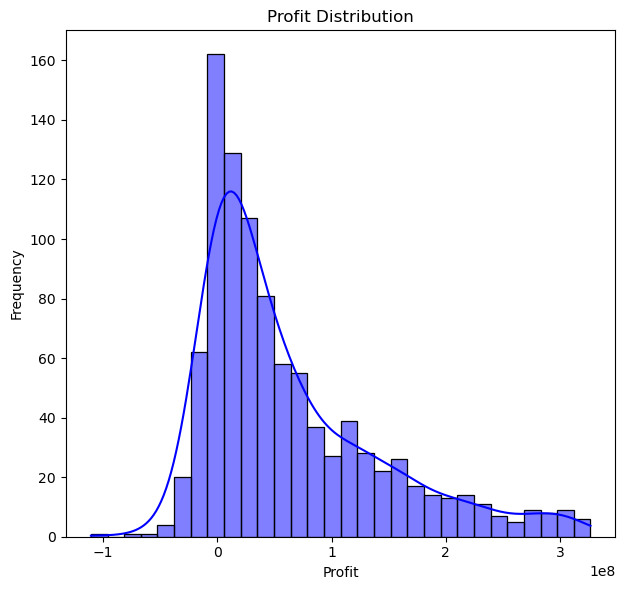

In [890]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot: Profit Distribution
plt.subplot(1, 2, 1)
sns.histplot(cleaned_data['profit'], kde=True, color='blue', bins=30)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

#### Skewness of the distribution
The profit values are positively skewed, it means most of the observations have lower or negative profits, but there are a few projects or entities with high profits.

### Correlation analysis
This will provide valuable insights into the relationships between several key financial metrics in the gross_budget dataset. This includes columns such as production budget, domestic gross, foreign gross, worldwide gross, and profit.

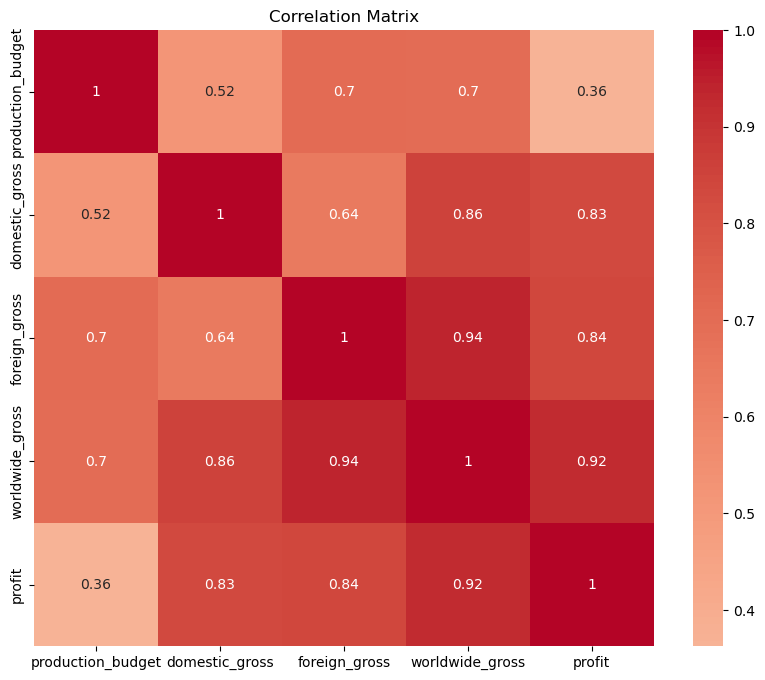

In [891]:
correlation_matrix = cleaned_data[['production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'profit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


The heatmap visually represents the correlation matrix thus the red colour in our indicates a strong positive relationship.

### Regression analysis
Below we are performing a simple linear regression analysis where the goal is to predict profit (y) based on the production budget (X).

In [892]:
# Basic regression analysis
from sklearn.linear_model import LinearRegression
X = cleaned_data[['production_budget']]
y = cleaned_data['profit']
model = LinearRegression()
model.fit(X, y)
print('\
Regression Results:')
print('R-squared:', round(model.score(X, y), 3))
print('Coefficient:', round(model.coef_[0], 3))
print('Intercept:', round(model.intercept_, 3))

Regression Results:
R-squared: 0.132
Coefficient: 0.668
Intercept: 35625725.024


The R-squared value of 0.132 indicates that only 13.2% of the variation in profit can be explained by the production budget alone.

The coefficient of 0.668 means that for each additional dollar spent on the production budget, profit is expected to increase by 0.668 units (assuming all other factors are constant).